In [62]:
# importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [64]:
# Load the MovieLens dataset
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Check the first few rows of data
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [66]:
movies.isnull().sum() # checking if any null present

movieId    0
title      0
genres     0
dtype: int64

In [68]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [70]:
ratings.isnull().sum() #checking if any nulls present

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### Merge both dataframes on movieId

In [73]:
final_df = pd.merge(movies,ratings,on='movieId')
final_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [75]:
final_df.shape

(105339, 6)

In [77]:
# drop timestamp as not required for analysis
data= final_df.drop(['timestamp'], axis=1)
data.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0


In [79]:
data.shape

(105339, 5)

In [81]:
data.describe(include='all') # summary statistics of data

,movieId,title,genres,userId,rating
count,105339.000000,105339,105339,105339.000000,105339.000000
unique,NaN,10323,938,NaN,NaN
top,NaN,Pulp Fiction (1994),Drama,NaN,NaN
freq,NaN,325,7678,NaN,NaN
mean,13381.312477,NaN,NaN,364.924539,3.516850
std,26170.456869,NaN,NaN,197.486905,1.044872
min,1.000000,NaN,NaN,1.000000,0.500000
25%,1073.000000,NaN,NaN,192.000000,3.000000
50%,2497.000000,NaN,NaN,383.000000,3.500000
75%,5991.000000,NaN,NaN,557.000000,4.000000


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  105339 non-null  int64  
 1   title    105339 non-null  object 
 2   genres   105339 non-null  object 
 3   userId   105339 non-null  int64  
 4   rating   105339 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [85]:
data.userId.nunique

<bound method IndexOpsMixin.nunique of 0           2
1           5
2           8
3          11
4          14
         ... 
105334    475
105335    458
105336    576
105337    668
105338    475
Name: userId, Length: 105339, dtype: int64>

### Visual Representation of data

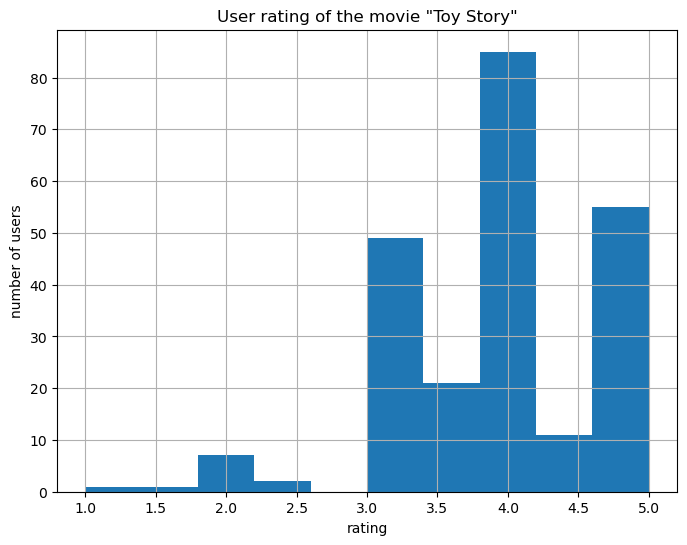

In [88]:
# Ratings as per movie 'Toy Story'
plt.figure(figsize=(8,6))
movie_grp=data.groupby('title')
toy_story = movie_grp.get_group('Toy Story (1995)')
toy_story['rating'].hist()
plt.title('User rating of the movie "Toy Story"')
plt.xlabel('rating')
plt.ylabel('number of users')
plt.show()

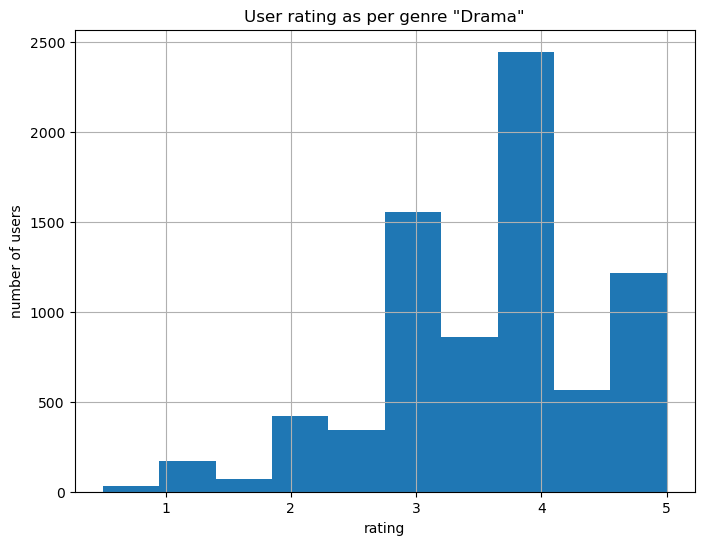

In [90]:
# Ratings as per Genre 'Drama'
plt.figure(figsize=(8,6))
movie_grp=data.groupby('genres')
genre_grp = movie_grp.get_group('Drama')
genre_grp['rating'].hist()
plt.title('User rating as per genre "Drama"')
plt.xlabel('rating')
plt.ylabel('number of users')
plt.show()

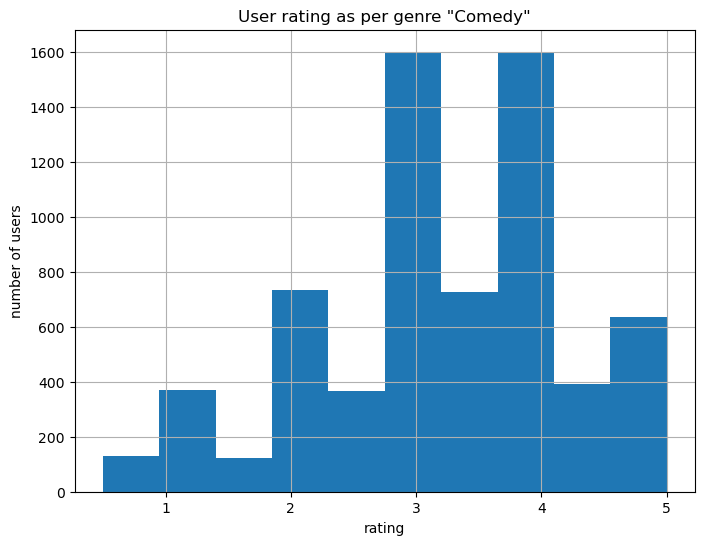

In [91]:
# Ratings as per Genre 'Comedy'
plt.figure(figsize=(8,6))
movie_grp=data.groupby('genres')
genre_grp = movie_grp.get_group('Comedy')
genre_grp['rating'].hist()
plt.title('User rating as per genre "Comedy"')
plt.xlabel('rating')
plt.ylabel('number of users')
plt.show()

In [94]:
rating_avg=data.groupby('title')['rating'].mean()
rating_avg.head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

In [96]:
#sorting ratings in descending order
rating_avg = rating_avg.sort_values(ascending=False)
rating_avg.head()

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

### Rating count/number of ratings for the movies

In [99]:
rating_count=data.groupby('title')['rating']
rating_count=rating_count.count().sort_values(ascending=False)
rating_count[:25]

title
Pulp Fiction (1994)                                                               325
Forrest Gump (1994)                                                               311
Shawshank Redemption, The (1994)                                                  308
Jurassic Park (1993)                                                              294
Silence of the Lambs, The (1991)                                                  290
Star Wars: Episode IV - A New Hope (1977)                                         273
Matrix, The (1999)                                                                261
Terminator 2: Judgment Day (1991)                                                 253
Braveheart (1995)                                                                 248
Schindler's List (1993)                                                           248
Fugitive, The (1993)                                                              244
Toy Story (1995)                                

In [101]:
rating_avg_count=pd.DataFrame(data=rating_avg)
rating_avg_count['number_of_ratings']=pd.DataFrame(rating_count)
rating_avg_count.head()

,rating,number_of_ratings
title,,
"Saddest Music in the World, The (2003)",5.0,1
Interstate 60 (2002),5.0,2
"Gunfighter, The (1950)",5.0,1
Heima (2007),5.0,1
Limelight (1952),5.0,1


In [103]:
rating_avg_count.describe()

,rating,number_of_ratings
count,10323.000000,10323.000000
mean,3.177222,10.204301
std,0.817540,22.834557
min,0.500000,1.000000
25%,2.750000,1.000000
50%,3.272727,3.000000
75%,3.750000,8.000000
max,5.000000,325.000000


### Top 25 movies 
### ratings excluding movies with less than 10 ratings

In [106]:
filter_data=rating_avg_count[rating_avg_count['number_of_ratings'] > 10]
filter_data[:25]

,rating,number_of_ratings
title,,
All Quiet on the Western Front (1930),4.500000,13
Paths of Glory (1957),4.500000,19
Nausicaä of the Valley of the Wind (Kaze no tani no Naushika) (1984),4.477273,22
Touch of Evil (1958),4.476190,21
Creature Comforts (1989),4.461538,13
Cinema Paradiso (Nuovo cinema Paradiso) (1989),4.459459,37
"Shawshank Redemption, The (1994)",4.454545,308
Dr. Horrible's Sing-Along Blog (2008),4.434783,23
"Man for All Seasons, A (1966)",4.409091,11


### Ratings for all movies reviewed by userId 475

In [109]:
user_475=data[data['userId']==475]
user_475

,movieId,title,genres,userId,rating
297,2,Jumanji (1995),Adventure|Children|Fantasy,475,3.0
538,6,Heat (1995),Action|Crime|Thriller,475,5.0
606,7,Sabrina (1995),Comedy|Romance,475,3.5
757,10,GoldenEye (1995),Action|Adventure|Thriller,475,4.5
883,12,Dracula: Dead and Loving It (1995),Comedy|Horror,475,3.5
...,...,...,...,...,...
105326,144656,The Measure of a Man (2015),Drama,475,3.5
105329,146344,Elämältä kaiken sain ( ),Comedy|Drama,475,2.0
105331,146656,Creed (2015),Drama,475,3.0
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0


### Feature Engineering

In [112]:
data['genres'].value_counts().head()

genres
Drama             7678
Comedy            6676
Comedy|Romance    3733
Drama|Romance     3407
Comedy|Drama      3101
Name: count, dtype: int64

In [114]:
data['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

### Encoding genres with one hot encoding

In [117]:
genre=data['genres'].str.get_dummies().add_prefix('Genre_')
genre.head()

,Genre_(no genres listed),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_IMAX,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [118]:
final_data=pd.concat([data,genre],axis=1)
final_data.head()

,movieId,title,genres,userId,rating,Genre_(no genres listed),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children,...,Genre_Film-Noir,Genre_Horror,Genre_IMAX,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# Drop the genres column from final_data
final_data = final_data.drop('genres',axis=1)
final_data.head()

,movieId,title,userId,rating,Genre_(no genres listed),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children,Genre_Comedy,...,Genre_Film-Noir,Genre_Horror,Genre_IMAX,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),2,5.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),5,4.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),8,5.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),11,4.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),14,4.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [120]:
final_data.columns

Index(['movieId', 'title', 'userId', 'rating', 'Genre_(no genres listed)',
       'Genre_Action', 'Genre_Adventure', 'Genre_Animation', 'Genre_Children',
       'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary', 'Genre_Drama',
       'Genre_Fantasy', 'Genre_Film-Noir', 'Genre_Horror', 'Genre_IMAX',
       'Genre_Musical', 'Genre_Mystery', 'Genre_Romance', 'Genre_Sci-Fi',
       'Genre_Thriller', 'Genre_War', 'Genre_Western'],
      dtype='object')

In [125]:
final_data.dtypes

movieId                       int64
title                        object
userId                        int64
rating                      float64
Genre_(no genres listed)      int64
Genre_Action                  int64
Genre_Adventure               int64
Genre_Animation               int64
Genre_Children                int64
Genre_Comedy                  int64
Genre_Crime                   int64
Genre_Documentary             int64
Genre_Drama                   int64
Genre_Fantasy                 int64
Genre_Film-Noir               int64
Genre_Horror                  int64
Genre_IMAX                    int64
Genre_Musical                 int64
Genre_Mystery                 int64
Genre_Romance                 int64
Genre_Sci-Fi                  int64
Genre_Thriller                int64
Genre_War                     int64
Genre_Western                 int64
dtype: object

In [127]:
final_data['rating']=final_data['rating'].astype(int)
final_data['rating']

0         5
1         4
2         5
3         4
4         4
         ..
105334    3
105335    4
105336    4
105337    4
105338    4
Name: rating, Length: 105339, dtype: int32

In [129]:
final_data.dtypes

movieId                      int64
title                       object
userId                       int64
rating                       int32
Genre_(no genres listed)     int64
Genre_Action                 int64
Genre_Adventure              int64
Genre_Animation              int64
Genre_Children               int64
Genre_Comedy                 int64
Genre_Crime                  int64
Genre_Documentary            int64
Genre_Drama                  int64
Genre_Fantasy                int64
Genre_Film-Noir              int64
Genre_Horror                 int64
Genre_IMAX                   int64
Genre_Musical                int64
Genre_Mystery                int64
Genre_Romance                int64
Genre_Sci-Fi                 int64
Genre_Thriller               int64
Genre_War                    int64
Genre_Western                int64
dtype: object

In [149]:
moviemat = final_data.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
filter_data.sort_values('number_of_ratings',ascending=False).head(5)

,rating,number_of_ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290


In [159]:
#analysing correlation with similar movies
PulpFiction_ratings=moviemat['Pulp Fiction (1994)']
SilenceLambs_ratings=moviemat['Silence of the Lambs, The (1991)']

In [161]:
PulpFiction_ratings.head()

userId
1    4.0
2    NaN
3    5.0
4    4.0
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [163]:
SilenceLambs_ratings.head()

userId
1    5.0
2    NaN
3    5.0
4    4.0
5    NaN
Name: Silence of the Lambs, The (1991), dtype: float64

In [167]:
# Analysing correlation with similar movies
similar_to_Pulpfiction = moviemat.corrwith(PulpFiction_ratings)
similar_to_Silencelambs = moviemat.corrwith(SilenceLambs_ratings)

C:\Users\Riyaz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Riyaz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Riyaz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\Riyaz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Riyaz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [169]:
similar_to_Pulpfiction.head()

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Til There Was You (1997)                  1.000000
'burbs, The (1989)                        -0.595102
dtype: float64

In [171]:
similar_to_Silencelambs.head()

title
'71 (2014)                                     NaN
'Hellboy': The Seeds of Creation (2004)        NaN
'Round Midnight (1986)                         NaN
'Til There Was You (1997)                  1.00000
'burbs, The (1989)                        -0.37119
dtype: float64

In [173]:
corr_Pulpfiction=pd.DataFrame(similar_to_Pulpfiction,columns=['Correlation'])
corr_Pulpfiction.dropna(inplace=True)
corr_Pulpfiction.head()

,Correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",-0.595102
(500) Days of Summer (2009),0.071549
*batteries not included (1987),0.842701
...And Justice for All (1979),1.000000


In [131]:
### Separating X and Y variables
X = final_data.drop(['rating','title','movieId','userId'], axis=1)
X

,Genre_(no genres listed),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_IMAX,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105334,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105335,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
105336,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
105337,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [133]:
y=final_data['rating']
y

0         5
1         4
2         5
3         4
4         4
         ..
105334    3
105335    4
105336    4
105337    4
105338    4
Name: rating, Length: 105339, dtype: int32

In [135]:
X.shape,y.shape

((105339, 20), (105339,))

In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((84271, 20), (21068, 20), (84271,), (21068,))

### Linear Regression

In [140]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [141]:
y_pred=linreg.predict(X_test)
y_pred

array([3.36033484, 3.27506979, 3.64397503, ..., 3.4856516 , 3.53172102,
       3.53172102])

In [142]:
#Evaluation Metrics
r2_score(y_test,y_pred)

0.031221479579768285

In [146]:
pred_df = pd.DataFrame({'Test':y_test,'Prediction':y_pred})
pred_df.head()

,Test,Prediction
51661,3,3.360335
21569,4,3.275070
96303,3,3.643975
1925,3,3.235891
59288,3,3.485652
